# Avocado Price Prediction Regression Models

## Table of Contents

1. [Problem Statement](#1)
2. [Importing Libraries](#2)
3. [Data](#3)
  - Loading data
  - Description of data columns
  - Understanding data - Pre-Profiling
4. [Exploratory Data Analysis](#4)
  - Pre processing data
      - Handling missing values
      - Type conversions
      - Feature engineering
      - Transforming exploratory variable
  - Post profiling
5. [Modelling using sklearn](#5)
  - Data Preparation
    - Splitting data as train and test
    - Scaling and encoding
  - Building Models
  - Model Predictions
6. [Model Evaluations](#6)
7. [Model Plotting](#7)
    - Comparing models
8. [Conclusions](#8)
    - Analyzing and finalizing best-fit model

<section id='1' />

## 1. Problem Statement
---

Given historical data on avocado prices and sales volume in multiple US markets and various other factors like Date, AveragePrice,Total Volume, Total Bags,Year,Type etc.

The goal is to predict average price of avocado using best regression model among Linear Regression, Decision Tree Regressor and Random Forest Regressor.

<section id='2' />

## 2. Importing Libraries
---

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Setting options
np.set_printoptions(precision=4)                 # Display values upto four decimal places
plt.style.use('seaborn-whitegrid')               # Apply seaborn whitegrid style to the plots
plt.rc('figure', figsize=(20, 12))               # Default figure size of plots
sns.set(style='whitegrid')                       # Apply whitegrid style to the plots
warnings.filterwarnings('ignore')                # Ignore warnings, if any

<section id='3' />

## 3. Data
---

### Loading data...

In [2]:
# Importing the dataset as `data`
data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/avocado.csv', index_col=0)
data.sample(8)    # Preview of random 8 rows 

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
15,2015-09-13,1.16,238903.72,63924.76,55553.71,37519.32,81905.93,80146.20,1759.73,0.00,conventional,2015,RaleighGreensboro
7,2016-11-06,1.78,266345.33,93518.61,137695.34,1450.27,33681.11,33675.22,5.89,0.00,conventional,2016,Sacramento
4,2018-02-25,1.37,9144.20,206.39,542.89,0.00,8394.92,7895.92,499.00,0.00,organic,2018,Tampa
20,2015-08-09,1.77,4599.05,2327.49,56.78,0.00,2214.78,2214.78,0.00,0.00,organic,2015,Orlando
20,2017-08-13,1.85,200716.07,7031.08,35496.01,220.30,157968.68,146634.24,11334.44,0.00,organic,2017,Northeast
51,2017-01-08,0.80,938061.93,106390.45,348112.17,274.97,483284.34,456141.41,26533.02,609.91,conventional,2017,Seattle
22,2015-07-26,2.12,8182.86,2850.16,5160.65,0.00,172.05,172.05,0.00,0.00,organic,2015,Sacramento
11,2018-01-07,1.91,30096.00,14.46,2704.48,0.00,27377.06,25121.53,2255.53,0.00,organic,2018,Boston


### Description of data columns


<p>
The dataset consists of the information about HASS Avocado. 

Historical data on avocado prices and sales volume in multiple US markets. Various variables present in the dataset includes Date, AveragePrice,Total Volume, Total Bags,Year,Type etc.

The dataset comprises of 18249 observations of 14 columns. Below is a table showing names of all the columns and their description.
</p>

|Column|Description|
|--:|:--|
|**Date**|The date of the observation|
|**AveragePrice**|Average price of a single avocado - ***Target Variable***|
|**Total Volume**|Total number of avocados sold|
|**4046**|Total avocados with PLU 4046 - *Small/Medium Hass Avocado (\~3-5oz avocado)* sold|
|**4225**|Total number of avocados with PLU 4225 - *Large Hass Avocado (\~8-10oz avocado)* sold|
|**4770**|Total number of avocados with PLU 4770 - *Extra Large Hass Avocado (\~10-15oz avocado)* sold|
|**type**|Conventional or Organic|
|**year**|Year of observation|
|**Region**|City or region of the observation|





In [3]:
data.shape                           # Number of (records, features) of data

(18249, 13)

In [4]:
data.info()                          # Info of data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


In [5]:
data.describe()                      # Descriptive statistics of data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


* There are total of 18249 and 13 columns 
* From `info`, we can infer that there are no missing values.
* Target Variable 'Average Price' looks normally distribured as mean and median(50 percentile value) are almost similar, but TV seems to be right skewed



### Understanding data - Pre-Profiling

In [6]:
pre_profile = data.profile_report(title='Avocado Pre-Profiling')   # Perform pre-profiling on data.

In [7]:
pre_profile.to_file('pre-profiling.html')                          # Save report to pre-profiling.html

In [8]:
# pre_profile.to_notebook_iframe()                                 # Display pre-profiling report inline. 

**Profiling before Data Processing** <br><br>
__Dataset info__:
- Number of variables: 13
- Number of observations: 18249
- Missing cells: 0


__Variables types__: 
- Numeric: 10
- Categorical: 3

__Observations__: 
* There seems to be some problem with __index__, as there are only 53 unique values and total records are 18000+
* __Target variable__ is normally distributed but slightly right skewed
* There is equal distribution of __conventional__ and __organic__ avocado types
* __Organic__ avocados are more costlier and are less in volume
* __Region__ and __Date__ are uniformly distributed and have high cardinality
* Most of variables like _4046, 4225, Total Bags, Small Bags, Large Bags_ are highly correlated with **Total Volume**

<section id='4' />

## 4. Exploratory Data Analysis
---

###  Pre processing data

* __Handling issues found in pre-profiling__
* __Preparing data for modelling__
      - Handling missing values
      - Type conversions
      - Feature engineering
      - Transforming exploratory variable
      
---

From the above observations we will:
- Reset_index
- Rename features as per conveniance
- Altering the type of features
- Feature engineer some columns
- Drop ineffective features
- Drop highly correlated features
- Drop records with right skewed target variable

Fixing issues with index

In [9]:
# Unique values in data index - doing this as profiling shows there are zeros in index
print('No. of unique index values:', data.index.nunique())                          

No. of unique index values: 53


In [10]:
data.reset_index(drop=True, inplace=True)    # reseting index as index values seems to be incorrect

# Unique values in data index after ressetting
print('No. of unique index values after resetting index: ', data.index.nunique())   

No. of unique index values after resetting index:  18249


Rename columns as per conveniance

In [11]:
# Renaming column names
data.rename(columns={'4046':'PLU_4046','4225':'PLU_4225','4770':'PLU_4770'}, inplace=True) # Renaming size as per description

# Renaming columns to remove spaces and capitalize first letter
data.columns = data.columns.str.replace(' ','').map(lambda x : x[0].upper() + x[1:]) 
data.head(2)    # Preview of column header

,Date,AveragePrice,TotalVolume,PLU_4046,PLU_4225,PLU_4770,TotalBags,SmallBags,LargeBags,XLargeBags,Type,Year,Region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany


Working with type of features...

In [12]:
data.dtypes        # Looking for data types

Date             object
AveragePrice    float64
TotalVolume     float64
PLU_4046        float64
PLU_4225        float64
PLU_4770        float64
TotalBags       float64
SmallBags       float64
LargeBags       float64
XLargeBags      float64
Type             object
Year              int64
Region           object
dtype: object

There are 3 categorical columns
* __Type__ has two values and distriburted uniformly
* __Date__ and __Region__ are highly cardinal, so we will work on how to proceed further...

Converting `Date` to `datetime` from `object`

Converting `Year` to `object` from `numeric`

In [13]:
data['Date'] = pd.to_datetime(data['Date'])    # Converting date to datetime type
data['Year'] = data['Year'].astype('object')   # Converting Year to object from numeric

Deriving some insightful columns from __Date__ - like 'Season', 'Month', 'Quarter'

In [14]:
# Utility / Helper Function - To categorize season based on date

def categorizing_seasons(date):
    month = date.month

    # Source - https://en.wikipedia.org/wiki/Season#Meteorological
    winter, spring, summer, autumn = ([12, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11])
    if month in winter:
        return 'Winter'
    elif month in spring:
        return 'Spring'
    elif month in summer:
        return 'Summer'
    else:
        return 'Autumn'

In [15]:
data['Month'] = data['Date'].dt.month_name()             # Deriving Month from Date
data['Quarter'] = data['Date'].dt.quarter                # Deriving Qurter from Date
data['Season'] = data['Date'].map(categorizing_seasons)  # Deriving Season from Date

Analyzing how `AveragePrice` varies w.r.t `Month`, `Quarter`, `Season`. 

In [16]:
# Utility / Helper Function - To update the variables as per data

def get_variables_from_data():
    # Target Variables
    y_column = 'AveragePrice'                                          
     
    # Categorical Feature variables 
    X_columns_cat = list(data.dtypes[data.dtypes.values == 'object'].index)  

    # Numeric Feature variables
    X_columns_num = list(data.dtypes[(data.dtypes.values != 'object') & (data.dtypes.index != y_column)].index)    

    # Feature variables
    X_columns = X_columns_num + X_columns_cat
    
    print('y_column:', y_column)
    print('X_columns: ',X_columns) 
    print('X_columns_num: ',X_columns_num) 
    print('X_columns_cat: ',X_columns_cat) 
    
    # Returning as a tuple
    return y_column, X_columns, X_columns_num, X_columns_cat

In [17]:
# Updating Variables
y_column, X_columns, X_columns_num, X_columns_cat = get_variables_from_data()

y_column: AveragePrice
X_columns:  ['Date', 'TotalVolume', 'PLU_4046', 'PLU_4225', 'PLU_4770', 'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags', 'Quarter', 'Type', 'Year', 'Region', 'Month', 'Season']
X_columns_num:  ['Date', 'TotalVolume', 'PLU_4046', 'PLU_4225', 'PLU_4770', 'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags', 'Quarter']
X_columns_cat:  ['Type', 'Year', 'Region', 'Month', 'Season']


In [18]:
data.groupby('Month')[y_column].agg(['max', 'mean', 'min'])   # Understanding TV w.r.t 'Month'

,max,mean,min
Month,,,
April,3.17,1.374380,0.51
August,3.04,1.512514,0.58
December,2.67,1.331112,0.49
February,2.59,1.274387,0.46
January,2.70,1.311019,0.51
July,2.75,1.462077,0.56
June,2.77,1.408964,0.52
March,3.05,1.332255,0.44
May,2.73,1.346601,0.55


In [19]:
data.groupby('Quarter')[y_column].agg(['max', 'mean', 'min'])  # Understanding TV w.r.t 'Quarter'

,max,mean,min
Quarter,,,
1,3.05,1.306605,0.44
2,3.17,1.375033,0.51
3,3.04,1.512913,0.56
4,3.25,1.458588,0.49


In [20]:
data.groupby('Season')[y_column].agg(['max', 'mean', 'min'])  # Understanding TV w.r.t 'Season'

,max,mean,min
Season,,,
Autumn,3.25,1.536147,0.58
Spring,3.17,1.349266,0.44
Summer,3.04,1.462572,0.52
Winter,2.70,1.304100,0.46


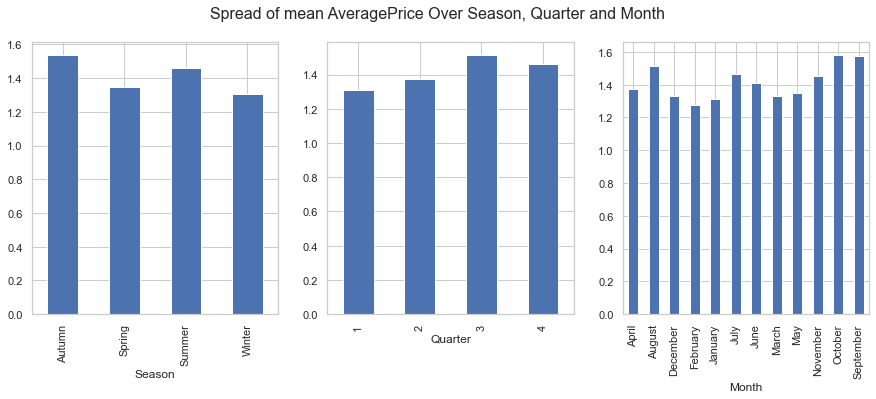

In [21]:
f, ax = plt.subplots(1, 3, figsize=(15,5))
f.suptitle('Spread of mean AveragePrice Over Season, Quarter and Month', fontsize=16)
data.groupby('Season')[y_column].mean().plot(kind='bar',ax=ax[0])
data.groupby('Quarter')[y_column].mean().plot(kind='bar',ax=ax[1])
data.groupby('Month')[y_column].mean().plot(kind='bar',ax=ax[2])

__Observations__

*   Average price drops in the months of December, January, February, May, June, July
*   No much variance in price w.r.t Quarter - So we can drop this column
*   In winters Avocado price drops more than any other seasons
*   As seasons and Dates are correlated with Month and gives more info, we can drop `Season`, `Date` and have `Month` column as an important feature

In [22]:
X_columns          # Preview of existing Feature columns 

['Date',
 'TotalVolume',
 'PLU_4046',
 'PLU_4225',
 'PLU_4770',
 'TotalBags',
 'SmallBags',
 'LargeBags',
 'XLargeBags',
 'Quarter',
 'Type',
 'Year',
 'Region',
 'Month',
 'Season']

In [23]:
# Replacing date with less cordinal column month
data.drop(columns=['Date', 'Season', 'Quarter'], inplace=True)   # Dropping Data, Quarter and Season columns

In [24]:
# Updating Variables
y_column, X_columns, X_columns_num, X_columns_cat = get_variables_from_data()

y_column: AveragePrice
X_columns:  ['TotalVolume', 'PLU_4046', 'PLU_4225', 'PLU_4770', 'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags', 'Type', 'Year', 'Region', 'Month']
X_columns_num:  ['TotalVolume', 'PLU_4046', 'PLU_4225', 'PLU_4770', 'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags']
X_columns_cat:  ['Type', 'Year', 'Region', 'Month']


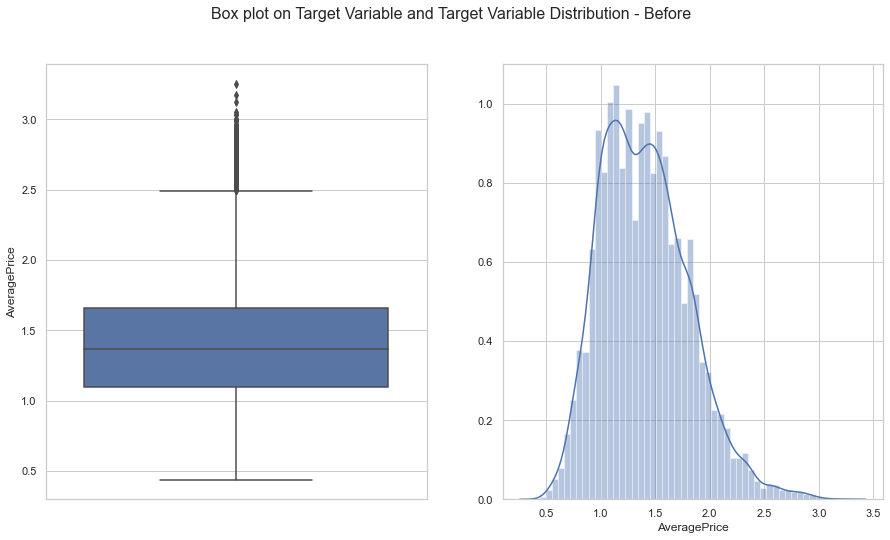

In [25]:
f, ax =  plt.subplots(1, 2, figsize=(15, 8))
f.suptitle('Box plot on Target Variable and Target Variable Distribution - Before', fontsize=16)
sns.boxplot(y=y_column, data=data, ax=ax[0]) # Box plot on TV before dropping extreme values
sns.distplot(data[y_column], ax=ax[1])       # Distribution of Target Variable

In [26]:
# Checking mean|median and limiting data to 2 * (mean|median) - To eliminate extreme right values
data[y_column].describe()                  

count    18249.000000
mean         1.405978
std          0.402677
min          0.440000
25%          1.100000
50%          1.370000
75%          1.660000
max          3.250000
Name: AveragePrice, dtype: float64

We will remove extreme values above avg price 2.8, this makes our TV symetric

In [27]:
data.drop(data[data[y_column] > 2.8].index, inplace=True) # Dropping records where price > 3
print(data.shape)                                         # Shape of data after dropping few records
data.sample(5)                                            # Preview of data after dropping few records

(18193, 13)


,AveragePrice,TotalVolume,PLU_4046,PLU_4225,PLU_4770,TotalBags,SmallBags,LargeBags,XLargeBags,Type,Year,Region,Month
3765,0.98,941066.42,547468.50,203888.47,4165.35,185544.10,117560.96,64239.81,3743.33,conventional,2016,Houston,July
6681,1.42,120001.00,65331.00,7096.00,195.00,47379.00,26125.00,21030.00,223.00,conventional,2017,Jacksonville,November
6059,1.88,674811.14,91477.74,349704.00,140354.25,93275.15,79635.38,9073.11,4566.66,conventional,2017,Chicago,August
3100,1.09,164790.54,1410.85,72074.47,1160.99,90144.23,90144.23,0.00,0.00,conventional,2016,BuffaloRochester,May
16638,1.50,71708.81,5373.18,23302.63,769.18,42263.82,18086.40,24177.42,0.00,organic,2017,Plains,March


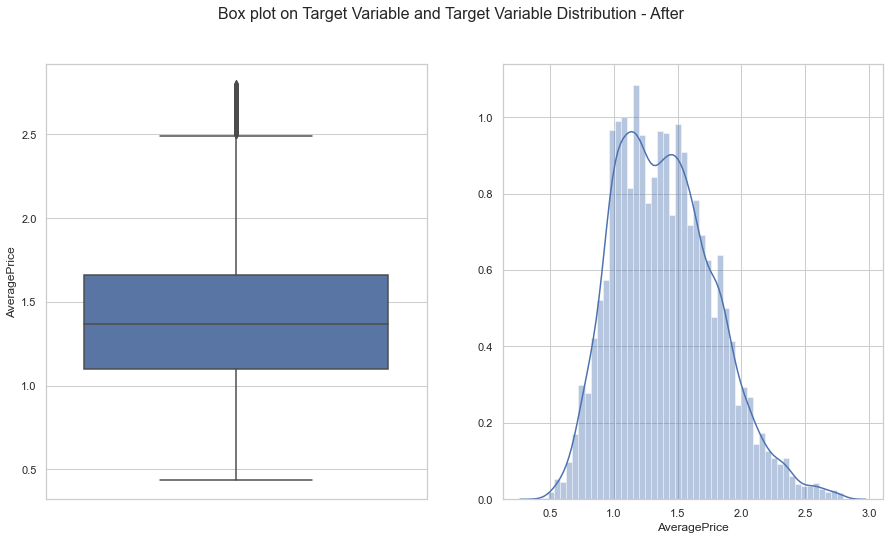

In [28]:
f, ax =  plt.subplots(1, 2, figsize=(15, 8))
f.suptitle('Box plot on Target Variable and Target Variable Distribution - After', fontsize=16)
sns.boxplot(y=y_column, data=data, ax=ax[0]) # Box plot on TV after dropping extreme values
sns.distplot(data[y_column], ax=ax[1])       # Distribution of Target Vaiable

EDA
How Price are varying w.r.t to Region

Price and Type relation


Separate X and y 
  - Do correlation and drop few columns
  - Joint plot
  - Dist Plot
  - Linear relation among x and y

In [29]:
data.head()   # Preview of data

,AveragePrice,TotalVolume,PLU_4046,PLU_4225,PLU_4770,TotalBags,SmallBags,LargeBags,XLargeBags,Type,Year,Region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,December
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,December
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,December
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,December
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,November


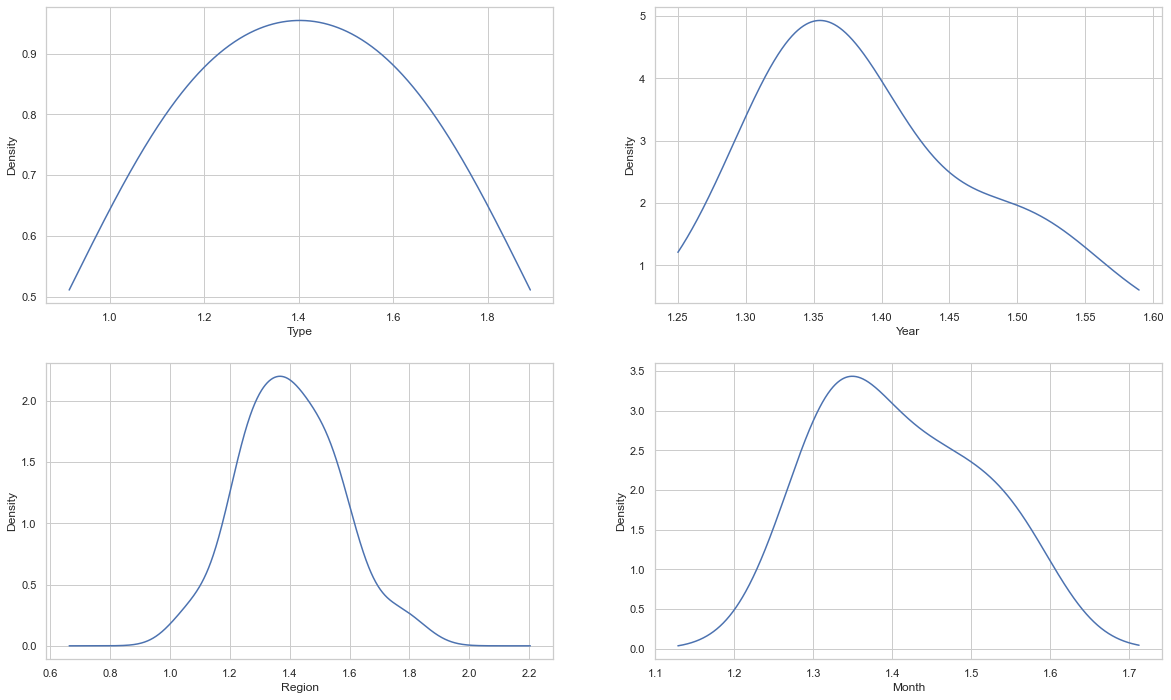

In [30]:
# Density of mean price w.r.t categorical columns
f, ax = plt.subplots(2,2)
for x_var, subplot in zip(X_columns_cat, ax.flatten()):
    subplot.set_xlabel(x_var)
    data.groupby(x_var)[y_column].mean().plot(kind='kde', ax=subplot, label='Test')

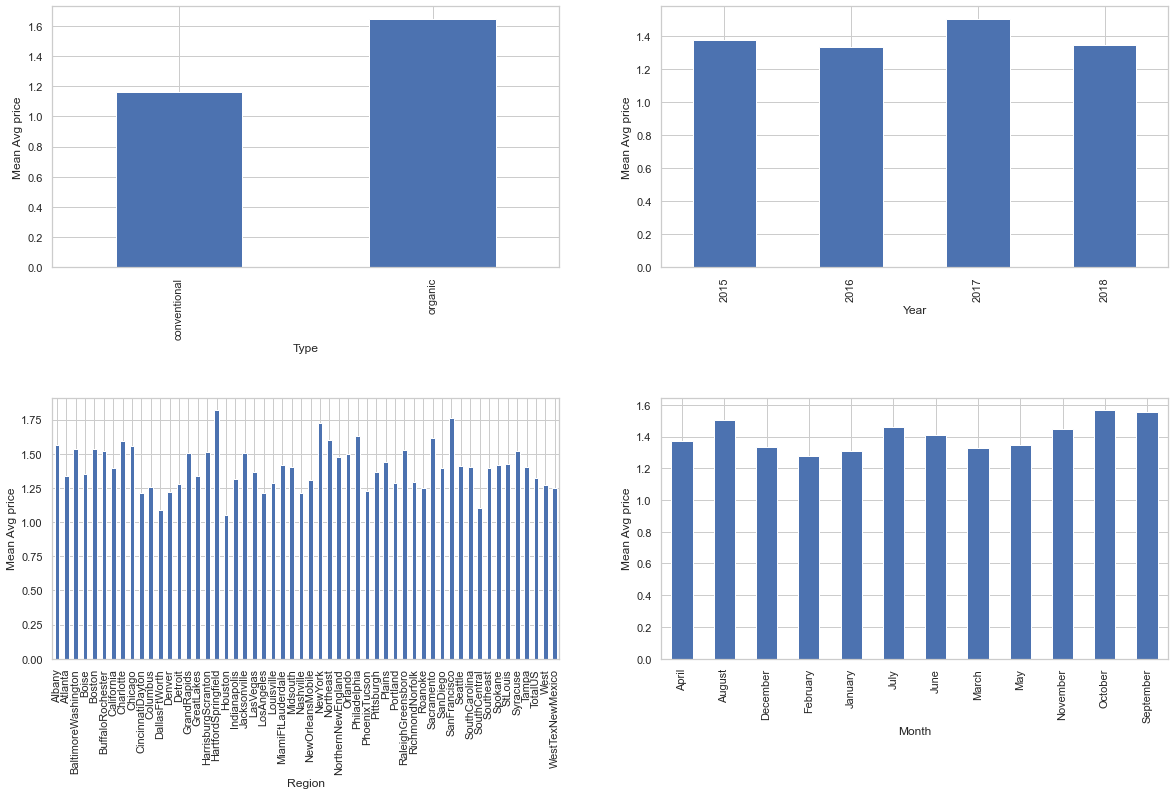

In [31]:
# Mean price w.r.t categorical columns
f, ax = plt.subplots(2,2)
plt.subplots_adjust(hspace=0.5)
for x_var, subplot in zip(X_columns_cat, ax.flatten()):
    subplot.set_xlabel(x_var)
    subplot.set_ylabel('Mean Avg price')
    data.groupby(x_var)[y_column].mean().plot(kind='bar', ax=subplot, label='Test')

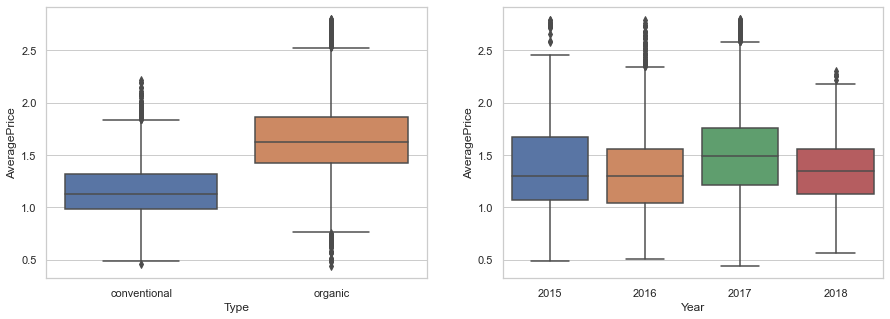

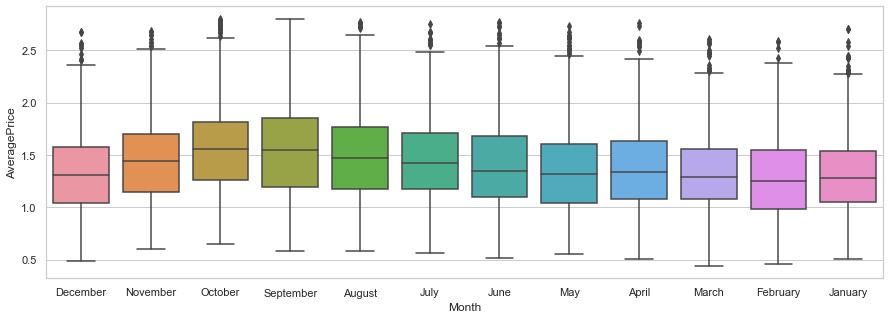

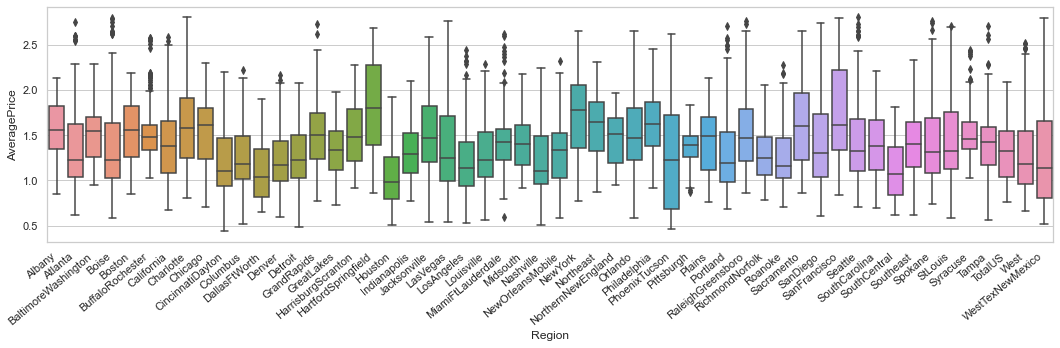

In [32]:
# Bot plot to check outliers in categorical columns

f, ax = plt.subplots(1,2, figsize=(15,5))
for x_var, subplot in zip(X_columns_cat[0:2], ax.flatten()):
    sns.boxplot(data = data, x=x_var, y=y_column, ax=subplot)

f, ax = plt.subplots(1, figsize=(15,5))
sns.boxplot(data = data, x=X_columns_cat[-1], y=y_column, ax=ax)

f, ax = plt.subplots(1, figsize=(15,5))
sns.boxplot(data = data, x=X_columns_cat[2], y=y_column, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

There are some outliers present but these are not too extreme so we do not drop any records

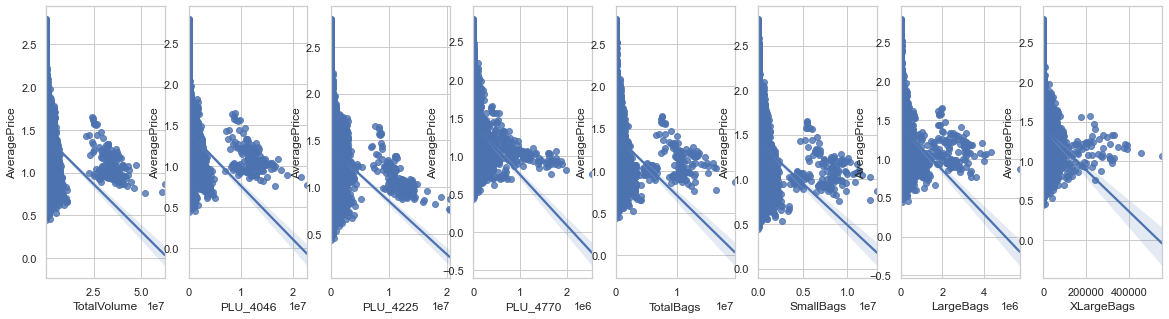

In [33]:
# Checking for relation of numeric columns w.r.t Target Variable
f, ax = plt.subplots(1, len(X_columns_num), figsize=(20, 5))

for x_var, sp in zip(X_columns_num, ax.flatten()):
    sns.regplot(x=data[x_var], y=data[y_column], ax=sp)

#### Assumptions - Checking for No Multicollinearity

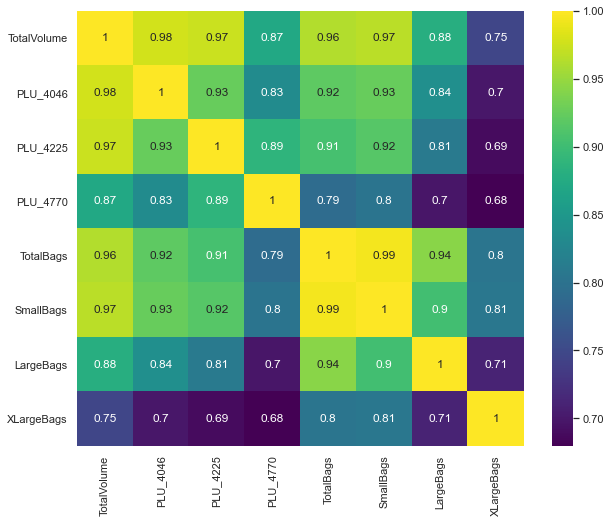

In [34]:
# Heatmap to check correlation
plt.figure(figsize=(10,8))
sns.heatmap(data[X_columns_num].corr(), annot=True, cmap='viridis')

So dropping 'PLU_4046', 'PLU_4225', 'TotalBags', 'SmallBags' which has very high Correlation

In [35]:
# Dropping highly correlated columns
data.drop(columns=['PLU_4046', 'PLU_4225', 'TotalBags', 'SmallBags'], inplace=True)

In [36]:
data.head(2)   # Preview after dropping columns

,AveragePrice,TotalVolume,PLU_4770,LargeBags,XLargeBags,Type,Year,Region,Month
0,1.33,64236.62,48.16,93.25,0.0,conventional,2015,Albany,December
1,1.35,54876.98,58.33,97.49,0.0,conventional,2015,Albany,December


In [37]:
# Updating Variables
y_column, X_columns, X_columns_num, X_columns_cat = get_variables_from_data()

y_column: AveragePrice
X_columns:  ['TotalVolume', 'PLU_4770', 'LargeBags', 'XLargeBags', 'Type', 'Year', 'Region', 'Month']
X_columns_num:  ['TotalVolume', 'PLU_4770', 'LargeBags', 'XLargeBags']
X_columns_cat:  ['Type', 'Year', 'Region', 'Month']


#### Assumption - Target Variable is Normally Distributed

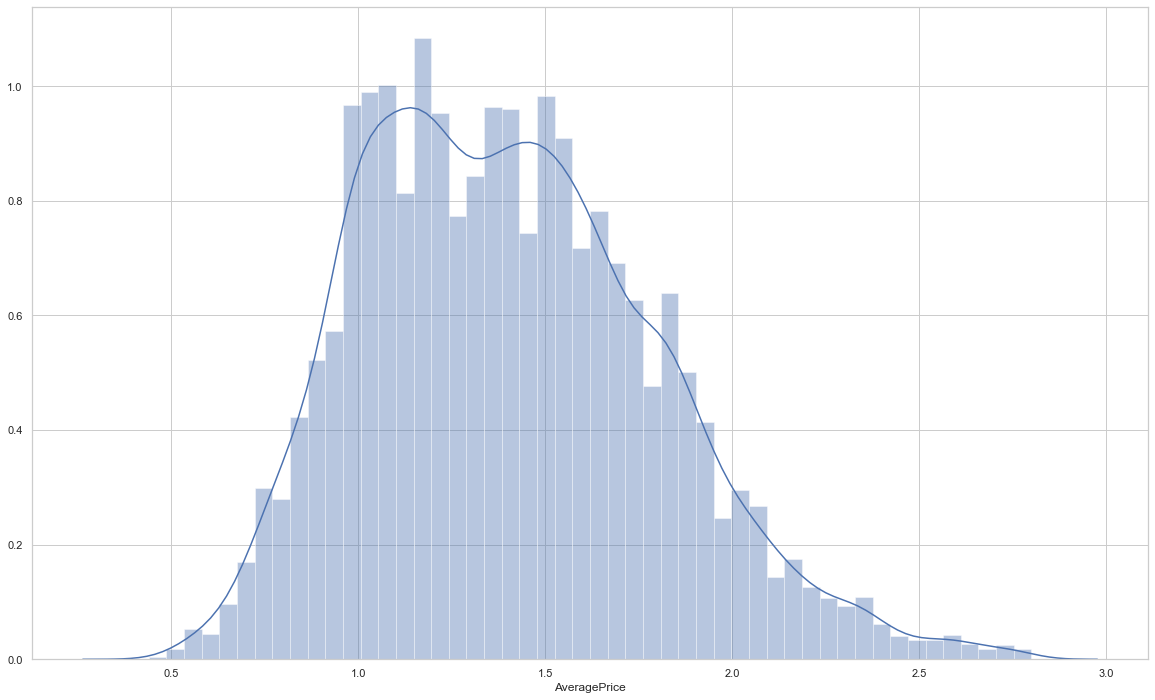

In [38]:
sns.distplot(data[y_column]) # Normal Distribution of Target Variable

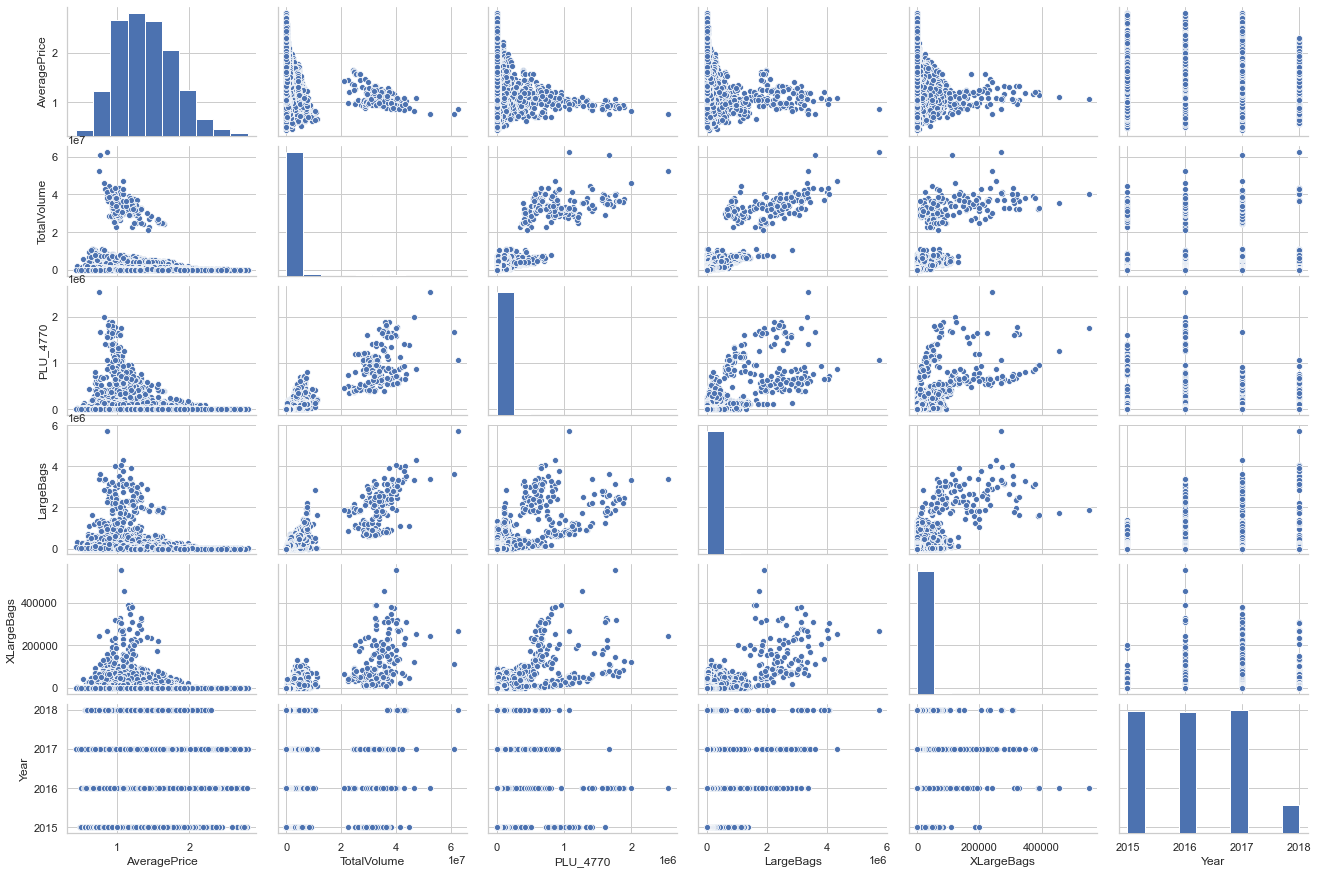

In [39]:
# Pair Plot of data
sns.pairplot(data, size = 2, aspect = 1.5)

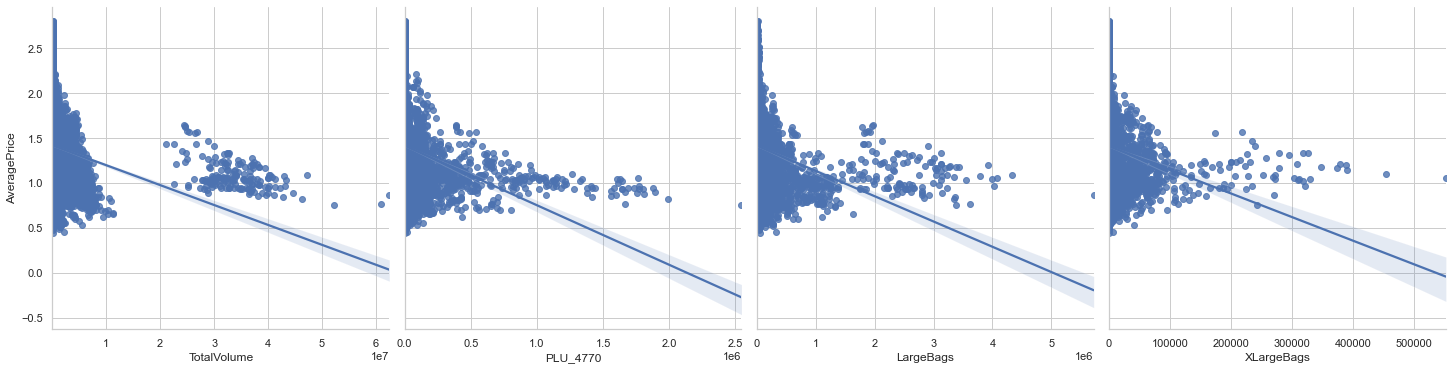

In [40]:
# Checking for relation of Numeric Features with Target Variable
sns.pairplot(data, x_vars=X_columns_num, y_vars=y_column, size=5, aspect=1, kind='reg') 

### Post profiling

In [41]:
post_profile = data.profile_report(title='Avocado Post-Profiling')   # Performing Post Profiling on data.

In [42]:
post_profile.to_file('post-profiling.html')                          # Saving report to post-profiling.html

In [43]:
# post_profile.to_notebook_iframe()                                    # View report inline here

<section id='5' />

## 5. Modelling using sklearn
---

### Preparing X and y

In [44]:
data.head(2) # Preview of data

,AveragePrice,TotalVolume,PLU_4770,LargeBags,XLargeBags,Type,Year,Region,Month
0,1.33,64236.62,48.16,93.25,0.0,conventional,2015,Albany,December
1,1.35,54876.98,58.33,97.49,0.0,conventional,2015,Albany,December


In [45]:
X_columns   # Preview of feature columns

['TotalVolume',
 'PLU_4770',
 'LargeBags',
 'XLargeBags',
 'Type',
 'Year',
 'Region',
 'Month']

In [46]:
X = data[X_columns]           # Features data
y = data[y_column]            # TV data

In [47]:
print(X.shape)
X.head()                      # Preview of X

(18193, 8)


,TotalVolume,PLU_4770,LargeBags,XLargeBags,Type,Year,Region,Month
0,64236.62,48.16,93.25,0.0,conventional,2015,Albany,December
1,54876.98,58.33,97.49,0.0,conventional,2015,Albany,December
2,118220.22,130.50,103.14,0.0,conventional,2015,Albany,December
3,78992.15,72.58,133.76,0.0,conventional,2015,Albany,December
4,51039.60,75.78,197.69,0.0,conventional,2015,Albany,November


In [48]:
print(y.shape)
y.head()                     # Preview of y

(18193,)


0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

In [49]:
# Splitting the dataset into training and test sets 80-20 split.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [50]:
# Reset index of split data sets
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [51]:
print(X_train.shape)
X_train.head()        # Preview of X_train

(14554, 8)


,TotalVolume,PLU_4770,LargeBags,XLargeBags,Type,Year,Region,Month
0,3938.37,0.00,40.00,0.00,organic,2016,Tampa,August
1,5094837.54,107753.58,341544.79,2239.59,conventional,2015,West,November
2,146103.34,110.54,629.20,0.00,conventional,2015,HarrisburgScranton,November
3,12275.26,53.05,366.60,0.00,organic,2017,RichmondNorfolk,October
4,52865.97,71.23,19822.36,0.00,conventional,2017,Louisville,October


In [52]:
print(X_test.shape)
X_test.head()         # Preview of X_test

(3639, 8)


,TotalVolume,PLU_4770,LargeBags,XLargeBags,Type,Year,Region,Month
0,398859.76,114.33,108538.55,0.00,conventional,2016,Orlando,December
1,1262932.78,2927.27,65166.34,0.00,conventional,2015,Houston,May
2,416298.84,13276.06,29.77,140.22,conventional,2015,Portland,December
3,57606.91,416.00,24496.54,0.00,organic,2016,Southeast,October
4,375225.76,1187.45,95.41,2212.30,conventional,2017,Sacramento,March


Scaling numerical fields using StandardScaler

In [53]:
X_train_num = X_train[X_columns_num]       # Numeric X_train 
X_test_num = X_test[X_columns_num]         # Numeric X_test

In [54]:
from sklearn.preprocessing import StandardScaler         # Importing Standard Scalar
scaler = StandardScaler().fit(X_train_num)               # Fitting with train data

In [55]:
X_train_s = pd.DataFrame(scaler.transform(X_train_num), columns=X_columns_num)  # Transforming train data
X_test_s = pd.DataFrame(scaler.transform(X_test_num), columns=X_columns_num)    # Transforming test data

In [56]:
print(X_train_s.shape)
X_train_s.head()            # Scaled train data - Numeric

(14554, 4)


,TotalVolume,PLU_4770,LargeBags,XLargeBags
0,-0.244740,-0.214141,-0.223880,-0.173600
1,1.244762,0.819485,1.215824,-0.048843
2,-0.203145,-0.213081,-0.221396,-0.173600
3,-0.242300,-0.213632,-0.222503,-0.173600
4,-0.230424,-0.213458,-0.140482,-0.173600


In [57]:
print(X_test_s.shape)
X_test_s.head()             # Scaled test data - Numeric

(3639, 4)


,TotalVolume,PLU_4770,LargeBags,XLargeBags
0,-0.129193,-0.213045,0.233524,-0.173600
1,0.123619,-0.186061,0.050677,-0.173600
2,-0.124091,-0.086791,-0.223923,-0.165789
3,-0.229037,-0.210151,-0.120777,-0.173600
4,-0.136108,-0.202751,-0.223646,-0.050363


Scaling numerical fields using StandardScaler

In [58]:
X_train[X_columns_cat].head()         # Preview of categorical features

,Type,Year,Region,Month
0,organic,2016,Tampa,August
1,conventional,2015,West,November
2,conventional,2015,HarrisburgScranton,November
3,organic,2017,RichmondNorfolk,October
4,conventional,2017,Louisville,October


There are 4 categorical features and as per below table we will perform encoding on each feature.

|Column|Type of Encoding|
|--:|:--|
|Type|**OneHot** - As there are only 2 unique values|
|Year|**Label** - To keep the ordinal importance|
|Region|**Target** - As it has high cardinality we can use TargetEncoding to have effect of each Region on AveragePrice|
|Month|**Target** - As it has high cardinality we can use TargetEncoding to have effect of each Month on AveragePrice|

In [59]:
# One Hot Encoding on Type for Train set.
X_train_type_dummies = pd.get_dummies(X_train['Type'], prefix='Type', drop_first=True)
print(X_train_type_dummies.shape)       # Shape of Dummies
X_train_type_dummies.head()             # Preview of Type Dummies               

(14554, 1)


,Type_organic
0,1
1,0
2,0
3,1
4,0


In [60]:
X_train_s = pd.concat([X_train_s, X_train_type_dummies], 1) # Merging type dummies to Scaled Train set
print(X_train_s.shape)                                      # Shape of merged train set
X_train_s.head()                                            # Preview of merged train set

(14554, 5)


,TotalVolume,PLU_4770,LargeBags,XLargeBags,Type_organic
0,-0.244740,-0.214141,-0.223880,-0.173600,1
1,1.244762,0.819485,1.215824,-0.048843,0
2,-0.203145,-0.213081,-0.221396,-0.173600,0
3,-0.242300,-0.213632,-0.222503,-0.173600,1
4,-0.230424,-0.213458,-0.140482,-0.173600,0


In [61]:
# One Hot Encoding on Type for Test set.
X_test_type_dummies = pd.get_dummies(X_test['Type'], prefix='Type', drop_first=True)
print(X_test_type_dummies.shape)       # Shape of Dummies
X_test_type_dummies.head()             # Preview of Type Dummies               

(3639, 1)


,Type_organic
0,0
1,0
2,0
3,1
4,0


In [62]:
X_test_s = pd.concat([X_test_s, X_test_type_dummies], 1)   # Merging type dummies to Scaled test set
print(X_test_s.shape)                                      # Shape of merged test set
X_test_s.head()                                            # Preview of merged test set

(3639, 5)


,TotalVolume,PLU_4770,LargeBags,XLargeBags,Type_organic
0,-0.129193,-0.213045,0.233524,-0.173600,0
1,0.123619,-0.186061,0.050677,-0.173600,0
2,-0.124091,-0.086791,-0.223923,-0.165789,0
3,-0.229037,-0.210151,-0.120777,-0.173600,1
4,-0.136108,-0.202751,-0.223646,-0.050363,0


In [63]:
# Label Encoding on Year for Train set.
from sklearn.preprocessing import LabelEncoder         # Importing Label Encoder
label_encoder = LabelEncoder().fit(X_train['Year'])    # Fitting on train set

In [64]:
X_train_year_dummies = pd.DataFrame(label_encoder.transform(X_train['Year']), columns=['Year'])
print(X_train_year_dummies.shape)       # Shape of Transformed Year
X_train_year_dummies.head()             # Preview of Transformed Year 

(14554, 1)


,Year
0,1
1,0
2,0
3,2
4,2


In [65]:
X_train_s = pd.concat([X_train_s, X_train_year_dummies], 1)   # Merging type dummies to Scaled train set
print(X_train_s.shape)                                        # Shape of merged train set
X_train_s.head()                                              # Preview of merged train set

(14554, 6)


,TotalVolume,PLU_4770,LargeBags,XLargeBags,Type_organic,Year
0,-0.244740,-0.214141,-0.223880,-0.173600,1,1
1,1.244762,0.819485,1.215824,-0.048843,0,0
2,-0.203145,-0.213081,-0.221396,-0.173600,0,0
3,-0.242300,-0.213632,-0.222503,-0.173600,1,2
4,-0.230424,-0.213458,-0.140482,-0.173600,0,2


In [66]:
X_test_year_dummies = pd.DataFrame(label_encoder.transform(X_test['Year']), columns=['Year'])
print(X_test_year_dummies.shape)       # Shape of Transformed Year
X_test_year_dummies.head()             # Preview of Transformed Year 

(3639, 1)


,Year
0,1
1,0
2,0
3,1
4,2


In [67]:
X_test_s = pd.concat([X_test_s, X_test_year_dummies], 1)   # Merging type dummies to Scaled test set
print(X_test_s.shape)                                      # Shape of merged test set
X_test_s.head()                                            # Preview of merged test set

(3639, 6)


,TotalVolume,PLU_4770,LargeBags,XLargeBags,Type_organic,Year
0,-0.129193,-0.213045,0.233524,-0.173600,0,1
1,0.123619,-0.186061,0.050677,-0.173600,0,0
2,-0.124091,-0.086791,-0.223923,-0.165789,0,0
3,-0.229037,-0.210151,-0.120777,-0.173600,1,1
4,-0.136108,-0.202751,-0.223646,-0.050363,0,2


In [68]:
# Installing category_encoders to import TargetEncoder
# !pip install category_encoders

In [69]:
# Label Encoding on Year for Train set.
from category_encoders import TargetEncoder                                # Importing Target Encoder
target_encoder_region = TargetEncoder().fit(X_train['Region'], y_train)    # Fitting on train set

In [70]:
X_train_region_dummies = target_encoder_region.transform(X_train['Region'])
print(X_train_region_dummies.shape)       # Shape of Transformed region
X_train_region_dummies.head()             # Preview of Transformed region 

(14554, 1)


,Region
0,1.405393
1,1.277011
2,1.519046
3,1.290218
4,1.289126


In [71]:
X_train_s = pd.concat([X_train_s, X_train_region_dummies], 1)   # Merging region dummies to Scaled train set
print(X_train_s.shape)                                          # Shape of merged train set
X_train_s.head()                                                # Preview of merged train set

(14554, 7)


,TotalVolume,PLU_4770,LargeBags,XLargeBags,Type_organic,Year,Region
0,-0.244740,-0.214141,-0.223880,-0.173600,1,1,1.405393
1,1.244762,0.819485,1.215824,-0.048843,0,0,1.277011
2,-0.203145,-0.213081,-0.221396,-0.173600,0,0,1.519046
3,-0.242300,-0.213632,-0.222503,-0.173600,1,2,1.290218
4,-0.230424,-0.213458,-0.140482,-0.173600,0,2,1.289126


In [72]:
X_test_region_dummies = target_encoder_region.transform(X_test['Region'])
print(X_test_region_dummies.shape)       # Shape of Transformed region
X_test_region_dummies.head()             # Preview of Transformed region 

(3639, 1)


,Region
0,1.497100
1,1.053796
2,1.286667
3,1.400506
4,1.634144


In [73]:
X_test_s = pd.concat([X_test_s, X_test_region_dummies], 1)     # Merging region dummies to Scaled train set
print(X_test_s.shape)                                          # Shape of merged train set
X_test_s.head()                                                # Preview of merged train set

(3639, 7)


,TotalVolume,PLU_4770,LargeBags,XLargeBags,Type_organic,Year,Region
0,-0.129193,-0.213045,0.233524,-0.173600,0,1,1.497100
1,0.123619,-0.186061,0.050677,-0.173600,0,0,1.053796
2,-0.124091,-0.086791,-0.223923,-0.165789,0,0,1.286667
3,-0.229037,-0.210151,-0.120777,-0.173600,1,1,1.400506
4,-0.136108,-0.202751,-0.223646,-0.050363,0,2,1.634144


In [74]:
target_encoder_month = TargetEncoder().fit(X_train['Month'], y_train)    # Fitting on train set for Month

In [75]:
X_train_month_dummies = target_encoder_month.transform(X_train['Month'])
print(X_train_month_dummies.shape)       # Shape of Transformed region
X_train_month_dummies.head()             # Preview of Transformed region 

(14554, 1)


,Month
0,1.505376
1,1.450355
2,1.450355
3,1.566992
4,1.566992


In [76]:
X_train_s = pd.concat([X_train_s, X_train_month_dummies], 1)    # Merging region dummies to Scaled train set
print(X_train_s.shape)                                          # Shape of merged train set
X_train_s.head()                                                # Preview of merged train set

(14554, 8)


,TotalVolume,PLU_4770,LargeBags,XLargeBags,Type_organic,Year,Region,Month
0,-0.244740,-0.214141,-0.223880,-0.173600,1,1,1.405393,1.505376
1,1.244762,0.819485,1.215824,-0.048843,0,0,1.277011,1.450355
2,-0.203145,-0.213081,-0.221396,-0.173600,0,0,1.519046,1.450355
3,-0.242300,-0.213632,-0.222503,-0.173600,1,2,1.290218,1.566992
4,-0.230424,-0.213458,-0.140482,-0.173600,0,2,1.289126,1.566992


In [77]:
X_test_month_dummies = target_encoder_month.transform(X_test['Month'])
print(X_test_month_dummies.shape)       # Shape of Transformed region
X_test_month_dummies.head()             # Preview of Transformed region 

(3639, 1)


,Month
0,1.329709
1,1.354971
2,1.329709
3,1.566992
4,1.325027


In [78]:
X_test_s = pd.concat([X_test_s, X_test_month_dummies], 1)      # Merging month dummies to Scaled train set
print(X_test_s.shape)                                          # Shape of merged train set
X_test_s.head()                                                # Preview of merged train set

(3639, 8)


,TotalVolume,PLU_4770,LargeBags,XLargeBags,Type_organic,Year,Region,Month
0,-0.129193,-0.213045,0.233524,-0.173600,0,1,1.497100,1.329709
1,0.123619,-0.186061,0.050677,-0.173600,0,0,1.053796,1.354971
2,-0.124091,-0.086791,-0.223923,-0.165789,0,0,1.286667,1.329709
3,-0.229037,-0.210151,-0.120777,-0.173600,1,1,1.400506,1.566992
4,-0.136108,-0.202751,-0.223646,-0.050363,0,2,1.634144,1.325027


#### Final data after Scalings and Encodings

In [79]:
print(X_train_s.shape)
X_train_s.head()                    # Preview of X_train

(14554, 8)


,TotalVolume,PLU_4770,LargeBags,XLargeBags,Type_organic,Year,Region,Month
0,-0.244740,-0.214141,-0.223880,-0.173600,1,1,1.405393,1.505376
1,1.244762,0.819485,1.215824,-0.048843,0,0,1.277011,1.450355
2,-0.203145,-0.213081,-0.221396,-0.173600,0,0,1.519046,1.450355
3,-0.242300,-0.213632,-0.222503,-0.173600,1,2,1.290218,1.566992
4,-0.230424,-0.213458,-0.140482,-0.173600,0,2,1.289126,1.566992


In [80]:
print(y_train.shape)
y_train.head()                    # Preview of y_train

(14554,)


0    1.39
1    0.88
2    1.17
3    1.62
4    1.98
Name: AveragePrice, dtype: float64

In [81]:
print(X_test_s.shape)
X_test_s.head()                    # Preview of X_test

(3639, 8)


,TotalVolume,PLU_4770,LargeBags,XLargeBags,Type_organic,Year,Region,Month
0,-0.129193,-0.213045,0.233524,-0.173600,0,1,1.497100,1.329709
1,0.123619,-0.186061,0.050677,-0.173600,0,0,1.053796,1.354971
2,-0.124091,-0.086791,-0.223923,-0.165789,0,0,1.286667,1.329709
3,-0.229037,-0.210151,-0.120777,-0.173600,1,1,1.400506,1.566992
4,-0.136108,-0.202751,-0.223646,-0.050363,0,2,1.634144,1.325027


In [82]:
print(y_test.shape)
y_test.head()                    # Preview of y_test

(3639,)


0    0.97
1    0.72
2    0.98
3    1.44
4    1.57
Name: AveragePrice, dtype: float64

### Building Models

In [83]:
# Importing Models
from sklearn.linear_model import LinearRegression              # Importing LinearRegression Algo
from sklearn.tree import DecisionTreeRegressor                 # Importing DecisionTreeRegressor Algo
from sklearn.ensemble import RandomForestRegressor             # Importing RandomForestRegressor Algo

In [84]:
# Creating our LinearRegression model and fitting the data into it.
linreg_model = LinearRegression()
linreg_model.fit(X_train_s, y_train)

LinearRegression()

In [85]:
# Creating our DecisionTreeRegressor model and fitting the data into it.
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_s, y_train)

DecisionTreeRegressor()

In [86]:
# Creating our RandomForestRegressor model and fitting the data into it.
rf_model=RandomForestRegressor()
rf_model.fit(X_train_s,y_train)

RandomForestRegressor()

### Hyper Parameter Tuning 
    - To find best RandomForestRegressor Using GridSearchCV and RandomizedSearchCV

In [87]:
# Preparations for Hyper Parameter Tuning

from sklearn.model_selection import GridSearchCV          # Importing GridSearchCV
from sklearn.model_selection import RandomizedSearchCV    # Importing RandomizedSearchCV

n_estimators = [10,50,100,200,300,500]                    # Number of trees in random forest
max_features = ['auto', 'log2',2,4,8,12]                  # Number of features to consider at every split
max_depth = [2,4,8,16,25]                                 # Maximum number of levels in tree=

# Creating param_grid for hyper-parameter tuning.
optimal_params_set = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth,}

In [88]:
# Creating our RandomForestRegressor model from GridSearchCV and fitting the data into it.
rf_model_grid = GridSearchCV(estimator = rf_model, param_grid=optimal_params_set, cv = 3, n_jobs = -1 )
rf_model_grid.fit(X_train_s,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 8, 16, 25],
                         'max_features': ['auto', 'log2', 2, 4, 8, 12],
                         'n_estimators': [10, 50, 100, 200, 300, 500]})

In [89]:
# Creating our RandomForestRegressor model from RandomizedSearchCV and fitting the data into it.
rf_model_random = RandomizedSearchCV(estimator = rf_model, param_distributions = optimal_params_set, 
                                     n_iter = 10, cv = 3, verbose=2, random_state=100, n_jobs = -1)
rf_model_random.fit(X_train_s, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    4.8s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   22.3s finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [2, 4, 8, 16, 25],
                                        'max_features': ['auto', 'log2', 2, 4,
                                                         8, 12],
                                        'n_estimators': [10, 50, 100, 200, 300,
                                                         500]},
                   random_state=100, verbose=2)

### Model Predictions

#### 1. Predictions from LinearRegression Model - linreg_model

In [90]:
# Predictions from `linreg_model` - TRAIN Set
y_train_pred_lr = linreg_model.predict(X_train_s)     # Predicted Target Values for TRAIN set.
print(y_train_pred_lr.shape)                          # Shape of Predicted Target Value - TRAIN set.
y_train_pred_lr[:10]                                  # Top 10 Predicted Target Values for TRAIN set.

(14554,)


array([1.7572, 1.0008, 1.2656, 1.7654, 1.275 , 1.0702, 0.803 , 1.2915,
       1.8102, 1.5315])

In [91]:
# Predictions from `linreg_model` - TEST Set
y_test_pred_lr = linreg_model.predict(X_test_s)     # Predicted Target Values for TEST set.
print(y_test_pred_lr.shape)                         # Shape of Predicted Target Value - TEST set.
y_test_pred_lr[:10]                                 # Top 10 Predicted Target Values for TEST set.

(3639,)


array([1.1611, 0.6927, 0.9007, 1.8196, 1.3518, 1.1513, 1.6478, 1.1699,
       1.3568, 0.9684])

#### 2. Predictions from DecisionTreeRegressor Model - dt_model

In [92]:
# Predictions from `dt_model` - TRAIN Set
y_train_pred_dt = dt_model.predict(X_train_s)         # Predicted Target Values for TRAIN set.
print(y_train_pred_dt.shape)                          # Shape of Predicted Target Value - TRAIN set.
y_train_pred_dt[:10]                                  # Top 10 Predicted Target Values for TRAIN set.

(14554,)


array([1.39, 0.88, 1.17, 1.62, 1.98, 0.93, 0.84, 1.16, 1.93, 1.81])

In [93]:
# Predictions from `dt_model` - TEST Set
y_test_pred_dt = dt_model.predict(X_test_s)          # Predicted Target Values for TEST set.
print(y_test_pred_dt.shape)                          # Shape of Predicted Target Value - TEST set.
y_test_pred_dt[:10]                                  # Top 10 Predicted Target Values for TEST set.

(3639,)


array([0.95, 0.76, 1.16, 1.35, 1.39, 1.22, 1.46, 1.45, 0.99, 1.01])

#### 3. Predictions from RandomForestRegressor Model - rf_model

In [94]:
# Predictions from `rf_model` - TRAIN Set
y_train_pred_rf = rf_model.predict(X_train_s)         # Predicted Target Values for TRAIN set.
print(y_train_pred_rf.shape)                          # Shape of Predicted Target Value - TRAIN set.
y_train_pred_rf[:10]                                  # Top 10 Predicted Target Values for TRAIN set.

(14554,)


array([1.3845, 0.8984, 1.1629, 1.658 , 1.9309, 1.0075, 0.8617, 1.1779,
       1.9519, 1.7987])

In [95]:
# Predictions from `rf_model` - TEST Set
y_test_pred_rf = rf_model.predict(X_test_s)          # Predicted Target Values for TEST set.
print(y_test_pred_rf.shape)                          # Shape of Predicted Target Value - TEST set.
y_test_pred_rf[:10]                                  # Top 10 Predicted Target Values for TEST set.

(3639,)


array([0.9489, 0.7456, 1.004 , 1.4745, 1.4318, 1.1523, 1.4263, 1.3724,
       1.0103, 0.9985])

#### 4. Predictions from RandomForestRegressor - GridSearchCV  - rf_model_grid

In [96]:
# Predictions from `rf_model_grid` - TRAIN Set
y_train_pred_rf_grid = rf_model_grid.predict(X_train_s)    # Predicted Target Values for TRAIN set.
print(y_train_pred_rf_grid.shape)                          # Shape of Predicted Target Value - TRAIN set.
y_train_pred_rf_grid[:10]                                  # Top 10 Predicted Target Values for TRAIN set.

(14554,)


array([1.3926, 0.9124, 1.1754, 1.6709, 1.905 , 0.9939, 0.8554, 1.1699,
       1.9582, 1.7956])

In [97]:
# Predictions from `rf_model_grid` - TEST Set
y_test_pred_rf_grid = rf_model_grid.predict(X_test_s)     # Predicted Target Values for TEST set.
print(y_test_pred_rf_grid.shape)                          # Shape of Predicted Target Value - TEST set.
y_test_pred_rf_grid[:10]                                  # Top 10 Predicted Target Values for TEST set.

(3639,)


array([0.9216, 0.762 , 1.0123, 1.4729, 1.4284, 1.1364, 1.4458, 1.4623,
       1.0294, 0.9842])

#### 5. Predictions from RandomForestRegressor - RandomizedSearchCV  - rf_model_random

In [98]:
# Predictions from `rf_model_random` - TRAIN Set
y_train_pred_rf_random = rf_model_random.predict(X_train_s)  # Predicted Target Values for TRAIN set.
print(y_train_pred_rf_random.shape)                          # Shape of Predicted Target Value - TRAIN set.
y_train_pred_rf_random[:10]                                  # Top 10 Predicted Target Values for TRAIN set.

(14554,)


array([1.3807, 0.9013, 1.1624, 1.6481, 1.9138, 0.9964, 0.8623, 1.1799,
       1.9352, 1.7966])

In [99]:
# Predictions from `rf_model_random` - TEST Set
y_test_pred_rf_random = rf_model_random.predict(X_test_s)     # Predicted Target Values for TEST set.
print(y_test_pred_rf_random.shape)                          # Shape of Predicted Target Value - TEST set.
y_test_pred_rf_random[:10]                                  # Top 10 Predicted Target Values for TEST set.

(3639,)


array([0.9354, 0.7436, 1.0013, 1.4688, 1.4354, 1.1584, 1.4286, 1.3817,
       1.0117, 0.998 ])

<section id='6' />

## 6. Model Evaluations


---



In [100]:
# Utility / Helper Function - Regression Model Evaluation

def regression_model_evaluation(y, y_pred, set_type='', features_count=None):
    '''
    Utility/Helper method to calulate the Evaluation parameters for a regression model
    '''
    from sklearn import metrics # Importing metrics from SK-Learn
    result = {}
    
    if set_type != '':
        set_type = '_'+set_type
        
    # Mean Absolute Error on train set.
    result['MAE'] = metrics.mean_absolute_error(y, y_pred) 
    # Mean Squared Error on train set.
    result['MSE'] = metrics.mean_squared_error(y, y_pred)  
    # Root Mean Squared Error on train set.
    result['RMSE'] = np.sqrt(result['MSE'])                      
    # R_squared on train set.
    result['R_squared'] = metrics.r2_score(y, y_pred)      
    
    # Adj r2 = 1-(1-R2)*(n-1)/(n-p-1)
    if features_count:
        # Adjusted R_squared on train set.
        result['Adj_R_squared'] = 1 - (((1 - result['R_squared']) * (len(y)-features_count))/(len(y)-features_count-1))
    # Returning with appending type to key and rounding value 
    return {f'{k}'+set_type: round(v, 4) for k, v in result.items()} 

#### 1. Evaluation Parameters for - linreg_model

In [101]:
# Evaluation metrics for LinearRegression - TRAIN set
metrics_lr_train = regression_model_evaluation(y_train, y_train_pred_lr, features_count=8)
metrics_lr_train

{'MAE': 0.1842,
 'MSE': 0.0577,
 'RMSE': 0.2401,
 'R_squared': 0.6294,
 'Adj_R_squared': 0.6294}

In [102]:
# Evaluation metrics for LinearRegression - TEST set
metrics_lr_test = regression_model_evaluation(y_test, y_test_pred_lr, features_count=8)
metrics_lr_test

{'MAE': 0.1838,
 'MSE': 0.0584,
 'RMSE': 0.2416,
 'R_squared': 0.6255,
 'Adj_R_squared': 0.6254}

In [103]:
# Converting metrics map to DataFrame
LR_Train_mertrics = pd.DataFrame(metrics_lr_train.items(), columns=['Metrics', 'LinearRegression'])
LR_Test_mertrics = pd.DataFrame(metrics_lr_test.items(), columns=['Metrics', 'LinearRegression'])

In [104]:
# To get the intercept of the model.
linreg_model.intercept_

-1.8468632175169326

In [105]:
# To get the coefficients of the model.
coefs = linreg_model.coef_
features = X_train_s.columns

list(zip(features,coefs))

[('TotalVolume', -0.010999507333149909),
 ('PLU_4770', -0.0005772196574476405),
 ('LargeBags', -0.006910517460527233),
 ('XLargeBags', 0.016404797505705875),
 ('Type_organic', 0.4886273597192916),
 ('Year', 0.054553918964871294),
 ('Region', 0.9931353505805841),
 ('Month', 1.1051232280342216)]

#### 2. Evaluation Parameters for - dt_model

In [106]:
# Evaluation metrics for DecisionTreeRegressor - TRAIN set
metrics_dt_train = regression_model_evaluation(y_train, y_train_pred_dt, features_count=8)
metrics_dt_train

{'MAE': 0.0, 'MSE': 0.0, 'RMSE': 0.0, 'R_squared': 1.0, 'Adj_R_squared': 1.0}

In [107]:
# Evaluation metrics for DecisionTreeRegressor - TEST set
metrics_dt_test = regression_model_evaluation(y_test, y_test_pred_dt, features_count=8)
metrics_dt_test

{'MAE': 0.1126,
 'MSE': 0.0291,
 'RMSE': 0.1705,
 'R_squared': 0.8134,
 'Adj_R_squared': 0.8133}

In [108]:
# Converting metrics map to DataFrame
DT_Train_mertrics = pd.DataFrame(metrics_dt_train.items(), columns=['Metrics', 'DecisionTreeRegressor'])
DT_Test_mertrics = pd.DataFrame(metrics_dt_test.items(), columns=['Metrics', 'DecisionTreeRegressor'])

In [109]:
# DecisionTreeRegressor Score; Same as R-Squared from X and y; So it internally calculates r-squared of y and y_pred (-from X)
print('Train set: ',dt_model.score(X_train_s,y_train))
print('Test set: ',dt_model.score(X_test_s,y_test))

Train set:  1.0
Test set:  0.8133632481423323


#### 3. Evaluation Parameters for - rf_model

In [110]:
# Evaluation metrics for RandomForestRegressor - TRAIN set
metrics_rf_train = regression_model_evaluation(y_train, y_train_pred_rf, features_count=8)
metrics_rf_train

{'MAE': 0.0326,
 'MSE': 0.0022,
 'RMSE': 0.047,
 'R_squared': 0.9858,
 'Adj_R_squared': 0.9858}

In [111]:
# Evaluation metrics for RandomForestRegressor - TEST set
metrics_rf_test = regression_model_evaluation(y_test, y_test_pred_rf, features_count=8)
metrics_rf_test

{'MAE': 0.0876,
 'MSE': 0.0156,
 'RMSE': 0.1248,
 'R_squared': 0.9,
 'Adj_R_squared': 0.9}

In [112]:
# Converting metrics map to DataFrame
RF_Train_mertrics = pd.DataFrame(metrics_rf_train.items(), columns=['Metrics', 'RandomForestRegressor'])
RF_Test_mertrics = pd.DataFrame(metrics_rf_test.items(), columns=['Metrics', 'RandomForestRegressor'])

In [113]:
# RandomForestRegressor Score; Same as R-Squared from X and y; So it internally calculates r-squared of y and y_pred (-from X)
print('Train set: ',rf_model.score(X_train_s,y_train))
print('Test set: ',rf_model.score(X_test_s,y_test))

Train set:  0.9857751322723466
Test set:  0.9000264990932224


#### 4. Evaluation Parameters for - rf_model_grid

In [114]:
# Evaluation metrics for RandomForestRegressor with GridSearchCV - TRAIN set
metrics_rf_grid_train = regression_model_evaluation(y_train, y_train_pred_rf_grid, features_count=8)
metrics_rf_grid_train

{'MAE': 0.0321,
 'MSE': 0.0021,
 'RMSE': 0.0454,
 'R_squared': 0.9868,
 'Adj_R_squared': 0.9868}

In [115]:
# Evaluation metrics for RandomForestRegressor with GridSearchCV - TEST set
metrics_rf_grid_test = regression_model_evaluation(y_test, y_test_pred_rf_grid, features_count=8)
metrics_rf_grid_test

{'MAE': 0.0868,
 'MSE': 0.015,
 'RMSE': 0.1226,
 'R_squared': 0.9035,
 'Adj_R_squared': 0.9034}

In [116]:
# Converting metrics map to DataFrame
RF_Grid_Train_mertrics = pd.DataFrame(metrics_rf_grid_train.items(), columns=['Metrics', 'RandomForestRegressor-GridSearchCV'])
RF_Grid_Test_mertrics = pd.DataFrame(metrics_rf_grid_test.items(), columns=['Metrics', 'RandomForestRegressor-GridSearchCV'])

#### 5. Evaluation Parameters for - rf_model_random

In [117]:
# Evaluation metrics for RandomForestRegressor with RandomizedSearchCV - TRAIN set
metrics_rf_random_train = regression_model_evaluation(y_train, y_train_pred_rf_random, features_count=8)
metrics_rf_random_train

{'MAE': 0.0323,
 'MSE': 0.0021,
 'RMSE': 0.0461,
 'R_squared': 0.9864,
 'Adj_R_squared': 0.9864}

In [118]:
# Evaluation metrics for RandomForestRegressor with RandomizedSearchCV - TEST set
metrics_rf_random_test = regression_model_evaluation(y_test, y_test_pred_rf_random, features_count=8)
metrics_rf_random_test

{'MAE': 0.0875,
 'MSE': 0.0155,
 'RMSE': 0.1246,
 'R_squared': 0.9003,
 'Adj_R_squared': 0.9003}

In [119]:
# Converting metrics map to DataFrame
RF_Random_Train_mertrics = pd.DataFrame(metrics_rf_random_train.items(), columns=['Metrics', 'RandomForestRegressor-RandomizedSearchCV'])
RF_Random_Test_mertrics = pd.DataFrame(metrics_rf_random_test.items(), columns=['Metrics', 'RandomForestRegressor-RandomizedSearchCV'])

Creating DataFrames of Metrics for 5 Models

In [120]:
# Merging Train metrics df
Train_mertrics = LR_Train_mertrics.merge(
                    DT_Train_mertrics, on='Metrics').merge(
                    RF_Train_mertrics, on='Metrics').merge(
                    RF_Grid_Train_mertrics, on='Metrics').merge(
                    RF_Random_Train_mertrics, on='Metrics').set_index(keys='Metrics').transpose()
Train_mertrics

Metrics,MAE,MSE,RMSE,R_squared,Adj_R_squared
LinearRegression,0.1842,0.0577,0.2401,0.6294,0.6294
DecisionTreeRegressor,0.0000,0.0000,0.0000,1.0000,1.0000
RandomForestRegressor,0.0326,0.0022,0.0470,0.9858,0.9858
RandomForestRegressor-GridSearchCV,0.0321,0.0021,0.0454,0.9868,0.9868
RandomForestRegressor-RandomizedSearchCV,0.0323,0.0021,0.0461,0.9864,0.9864


In [121]:
# Merginf Test metrics df
Test_mertrics = LR_Test_mertrics.merge(DT_Test_mertrics, on='Metrics').merge(
                    RF_Test_mertrics, on='Metrics').merge(
                    RF_Grid_Test_mertrics, on='Metrics').merge(
                    RF_Random_Test_mertrics, on='Metrics').set_index(keys='Metrics').transpose()
Test_mertrics

Metrics,MAE,MSE,RMSE,R_squared,Adj_R_squared
LinearRegression,0.1838,0.0584,0.2416,0.6255,0.6254
DecisionTreeRegressor,0.1126,0.0291,0.1705,0.8134,0.8133
RandomForestRegressor,0.0876,0.0156,0.1248,0.9000,0.9000
RandomForestRegressor-GridSearchCV,0.0868,0.0150,0.1226,0.9035,0.9034
RandomForestRegressor-RandomizedSearchCV,0.0875,0.0155,0.1246,0.9003,0.9003


In [122]:
# Merging Train and Test Metrics
model_mertrics = Train_mertrics.merge(Test_mertrics, left_index=True, right_index=True, suffixes=('_Train', '_Test'))
model_mertrics

Metrics,MAE_Train,MSE_Train,RMSE_Train,R_squared_Train,Adj_R_squared_Train,MAE_Test,MSE_Test,RMSE_Test,R_squared_Test,Adj_R_squared_Test
LinearRegression,0.1842,0.0577,0.2401,0.6294,0.6294,0.1838,0.0584,0.2416,0.6255,0.6254
DecisionTreeRegressor,0.0000,0.0000,0.0000,1.0000,1.0000,0.1126,0.0291,0.1705,0.8134,0.8133
RandomForestRegressor,0.0326,0.0022,0.0470,0.9858,0.9858,0.0876,0.0156,0.1248,0.9000,0.9000
RandomForestRegressor-GridSearchCV,0.0321,0.0021,0.0454,0.9868,0.9868,0.0868,0.0150,0.1226,0.9035,0.9034
RandomForestRegressor-RandomizedSearchCV,0.0323,0.0021,0.0461,0.9864,0.9864,0.0875,0.0155,0.1246,0.9003,0.9003


In [123]:
model_mertrics.columns = model_mertrics.columns.map(lambda x : x.replace('_squared', '2'))

<section id='7' />

## 7. Model Plotting

#### 1. LinearRegression

In [124]:
train_diff = pd.DataFrame({'Y_ACT':y_train , 'Y_Pred':y_train_pred_lr},columns=['Y_ACT','Y_Pred']) 
train_diff.head()    # Preview of DF - y_train and y_train_pred

,Y_ACT,Y_Pred
0,1.39,1.757205
1,0.88,1.000835
2,1.17,1.265616
3,1.62,1.765431
4,1.98,1.275022


In [125]:
test_diff = pd.DataFrame({'Y_ACT':y_test , 'Y_Pred':y_test_pred_lr},columns=['Y_ACT','Y_Pred'])
test_diff.head()    # Preview of DF - y_test and y_test_pred

,Y_ACT,Y_Pred
0,0.97,1.161088
1,0.72,0.692658
2,0.98,0.900706
3,1.44,1.819557
4,1.57,1.351823


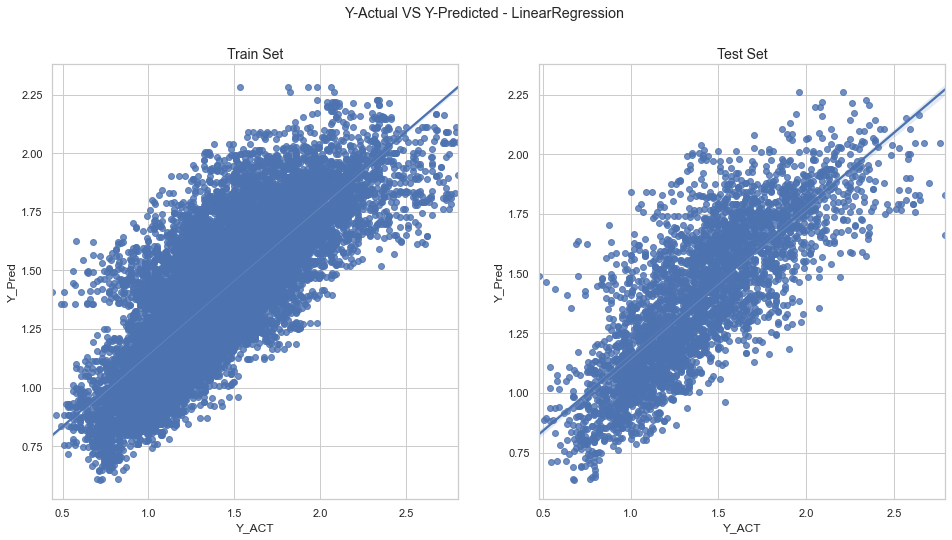

In [126]:
# Y-Actual VS Y-Predicted for LinearRegression
f, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))
f.suptitle('Y-Actual VS Y-Predicted - LinearRegression')
ax1.set_title('Train Set', fontsize=14)
sns.regplot(x='Y_ACT',y='Y_Pred',data=train_diff, ax=ax1)
ax2.set_title('Test Set', fontsize=14)
sns.regplot(x='Y_ACT',y='Y_Pred',data=test_diff, ax=ax2)

#### 2. DecisionTreeRegressor

In [127]:
train_diff = pd.DataFrame({'Y_ACT':y_train , 'Y_Pred':y_train_pred_dt},columns=['Y_ACT','Y_Pred'])
train_diff.head() # Preview of DF - y_train and y_train_pred

,Y_ACT,Y_Pred
0,1.39,1.39
1,0.88,0.88
2,1.17,1.17
3,1.62,1.62
4,1.98,1.98


In [128]:
test_diff = pd.DataFrame({'Y_ACT':y_test , 'Y_Pred':y_test_pred_dt},columns=['Y_ACT','Y_Pred'])
test_diff.head()   # Preview of DF - y_test and y_test_pred

,Y_ACT,Y_Pred
0,0.97,0.95
1,0.72,0.76
2,0.98,1.16
3,1.44,1.35
4,1.57,1.39


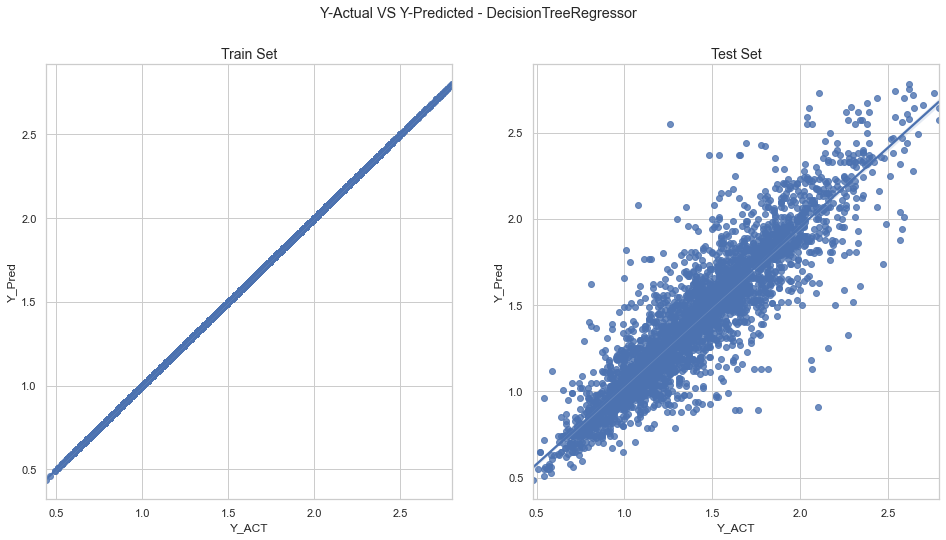

In [129]:
# Y-Actual VS Y-Predicted for DecisionTreeRegressor
f, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))
f.suptitle('Y-Actual VS Y-Predicted - DecisionTreeRegressor')
ax1.set_title('Train Set', fontsize=14)
sns.regplot(x='Y_ACT',y='Y_Pred',data=train_diff, ax=ax1)
ax2.set_title('Test Set', fontsize=14)
sns.regplot(x='Y_ACT',y='Y_Pred',data=test_diff, ax=ax2)

#### 3. RandomForestRegressor

In [130]:
train_diff = pd.DataFrame({'Y_ACT':y_train , 'Y_Pred':y_train_pred_rf},columns=['Y_ACT','Y_Pred'])
train_diff.head() # Preview of DF - y_train and y_train_pred

,Y_ACT,Y_Pred
0,1.39,1.3845
1,0.88,0.8984
2,1.17,1.1629
3,1.62,1.6580
4,1.98,1.9309


In [131]:
test_diff = pd.DataFrame({'Y_ACT':y_test , 'Y_Pred':y_test_pred_rf},columns=['Y_ACT','Y_Pred'])
test_diff.head()   # Preview of DF - y_test and y_test_pred

,Y_ACT,Y_Pred
0,0.97,0.9489
1,0.72,0.7456
2,0.98,1.0040
3,1.44,1.4745
4,1.57,1.4318


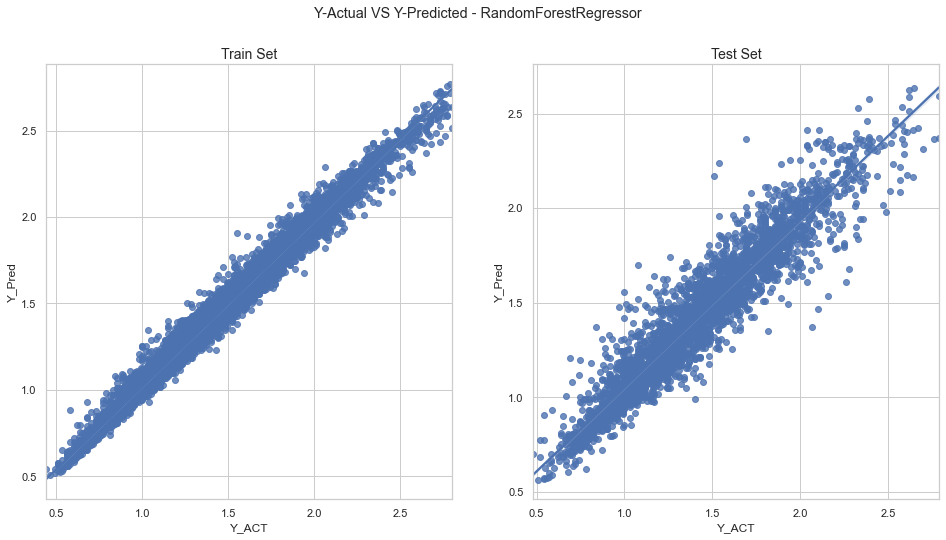

In [132]:
# Y-Actual VS Y-Predicted for RandomForestRegressor
f, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))
f.suptitle('Y-Actual VS Y-Predicted - RandomForestRegressor')
ax1.set_title('Train Set', fontsize=14)
sns.regplot(x='Y_ACT',y='Y_Pred',data=train_diff, ax=ax1)
ax2.set_title('Test Set', fontsize=14)
sns.regplot(x='Y_ACT',y='Y_Pred',data=test_diff, ax=ax2)

#### 4. RandomForestRegressor - GridSearchCV

In [133]:
train_diff = pd.DataFrame({'Y_ACT':y_train , 'Y_Pred':y_train_pred_rf_grid},columns=['Y_ACT','Y_Pred'])
train_diff.head() # Preview of DF - y_train and y_train_pred

,Y_ACT,Y_Pred
0,1.39,1.392645
1,0.88,0.912380
2,1.17,1.175355
3,1.62,1.670945
4,1.98,1.905020


In [134]:
test_diff = pd.DataFrame({'Y_ACT':y_test , 'Y_Pred':y_test_pred_rf_grid},columns=['Y_ACT','Y_Pred'])
test_diff.head()  # Preview of DF - y_test and y_test_pred

,Y_ACT,Y_Pred
0,0.97,0.92160
1,0.72,0.76204
2,0.98,1.01225
3,1.44,1.47288
4,1.57,1.42836


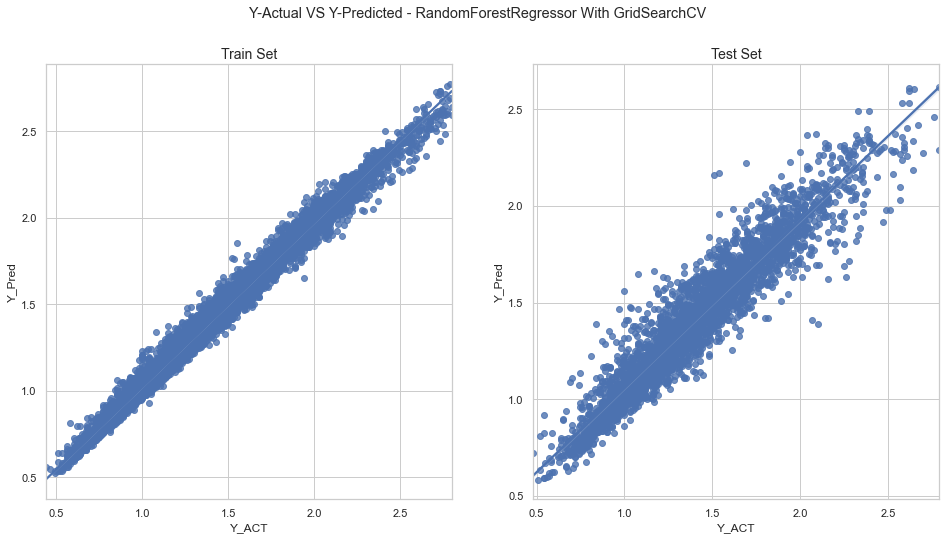

In [135]:
# Y-Actual VS Y-Predicted for RandomForestRegressor With GridSearchCV
f, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))
f.suptitle('Y-Actual VS Y-Predicted - RandomForestRegressor With GridSearchCV')
ax1.set_title('Train Set', fontsize=14)
sns.regplot(x='Y_ACT',y='Y_Pred',data=train_diff, ax=ax1)
ax2.set_title('Test Set', fontsize=14)
sns.regplot(x='Y_ACT',y='Y_Pred',data=test_diff, ax=ax2)

#### 5. RandomForestRegressor - RandomizedSearchCV

In [136]:
train_diff = pd.DataFrame({'Y_ACT':y_train , 'Y_Pred':y_train_pred_rf_random},columns=['Y_ACT','Y_Pred'])
train_diff.head() # Preview of DF - y_train and y_train_pred

,Y_ACT,Y_Pred
0,1.39,1.380722
1,0.88,0.901340
2,1.17,1.162400
3,1.62,1.648060
4,1.98,1.913780


In [137]:
test_diff = pd.DataFrame({'Y_ACT':y_test , 'Y_Pred':y_test_pred_rf_random},columns=['Y_ACT','Y_Pred'])
test_diff.head() # Preview of DF - y_test and y_test_pred

,Y_ACT,Y_Pred
0,0.97,0.935420
1,0.72,0.743600
2,0.98,1.001254
3,1.44,1.468800
4,1.57,1.435360


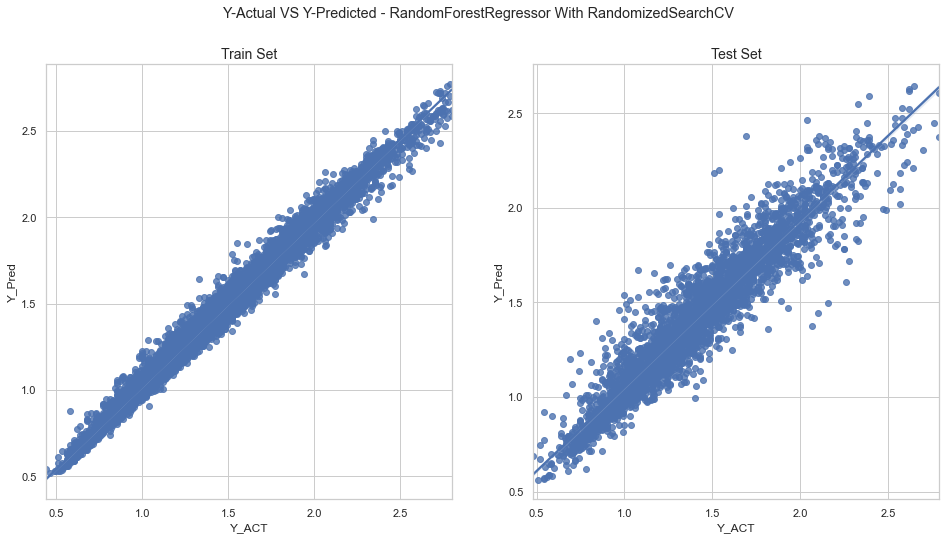

In [138]:
# Y-Actual VS Y-Predicted for RandomForestRegressor With RandomizedSearchCV
f, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))
f.suptitle('Y-Actual VS Y-Predicted - RandomForestRegressor With RandomizedSearchCV')
ax1.set_title('Train Set', fontsize=14)
sns.regplot(x='Y_ACT',y='Y_Pred',data=train_diff, ax=ax1)
ax2.set_title('Test Set', fontsize=14)
sns.regplot(x='Y_ACT',y='Y_Pred',data=test_diff, ax=ax2)

<section id='8' />

## 8. Conclusions

---


  - Analyzing and finalizing best-fit model

In [139]:
model_mertrics # Preview of Model Evaluation Metrics

Metrics,MAE_Train,MSE_Train,RMSE_Train,R2_Train,Adj_R2_Train,MAE_Test,MSE_Test,RMSE_Test,R2_Test,Adj_R2_Test
LinearRegression,0.1842,0.0577,0.2401,0.6294,0.6294,0.1838,0.0584,0.2416,0.6255,0.6254
DecisionTreeRegressor,0.0000,0.0000,0.0000,1.0000,1.0000,0.1126,0.0291,0.1705,0.8134,0.8133
RandomForestRegressor,0.0326,0.0022,0.0470,0.9858,0.9858,0.0876,0.0156,0.1248,0.9000,0.9000
RandomForestRegressor-GridSearchCV,0.0321,0.0021,0.0454,0.9868,0.9868,0.0868,0.0150,0.1226,0.9035,0.9034
RandomForestRegressor-RandomizedSearchCV,0.0323,0.0021,0.0461,0.9864,0.9864,0.0875,0.0155,0.1246,0.9003,0.9003


From the above table we can observe,
1. LinearRegression Model has less R-Squared Value - **UnderFit Model**
2. DecisionTreeRegressor Model has maximum R-Squared Value for train data and less R-Squared Value for test data - **OverFit Model**
3. RandomForestRegressor Model has a better R-Squared Value for test data
4. We can get best version of RandomForestRegressor by *hyper parameter tuning* with GridSearchCV or RandomizedSearchCV